# Recommendation System for Scholarship : Grant Me App



Import *Library*

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib as plt
import pathlib

Read the **Datasets**

In [2]:
# Read the data from the CSV file or use an existing dataframe
data = pd.read_csv('Data_Model_V2.csv')

# Separate the columns using semicolons
data[['IPK', 'Sertifikasi', 'Sertifikasi Professional', 'Prestasi Nasional', 'Lomba/Kompetisi Top 3 Nasional',
    'Prestasi Internasional', 'Lomba/Kompetisi Top 3 Internasional', 'Intern/Magang',
    'Volunteer/Kepanitiaan']] = data['IPK;Sertifikasi;Sertifikasi Professional;Prestasi Nasional;Lomba/Kompetisi Top 3 Nasional;Prestasi Internasional;Lomba/Kompetisi Top 3 Internasional;Intern/Magang;Volunteer/Kepanitiaan'].str.split(';', expand=True)

# Drop the unnecessary columns
data = data.drop(columns=['IPK;Sertifikasi;Sertifikasi Professional;Prestasi Nasional;Lomba/Kompetisi Top 3 Nasional;Prestasi Internasional;Lomba/Kompetisi Top 3 Internasional;Intern/Magang;Volunteer/Kepanitiaan'])

# Replace empty string values with NaN
data.replace('', np.nan, inplace=True)

# Convert data types to float if needed
data[['IPK', 'Sertifikasi', 'Sertifikasi Professional', 'Prestasi Nasional', 'Lomba/Kompetisi Top 3 Nasional',
    'Prestasi Internasional', 'Lomba/Kompetisi Top 3 Internasional', 'Intern/Magang',
    'Volunteer/Kepanitiaan']] = data[['IPK', 'Sertifikasi', 'Sertifikasi Professional', 'Prestasi Nasional', 'Lomba/Kompetisi Top 3 Nasional',
    'Prestasi Internasional', 'Lomba/Kompetisi Top 3 Internasional', 'Intern/Magang',
    'Volunteer/Kepanitiaan']].astype(float)

# Replace NaN values with mean or other replacement strategy
data.fillna(data.mean(), inplace=True)

# Get the columns to be used for clustering
X = data[['IPK', 'Sertifikasi', 'Sertifikasi Professional', 'Prestasi Nasional', 'Lomba/Kompetisi Top 3 Nasional',
        'Prestasi Internasional', 'Lomba/Kompetisi Top 3 Internasional', 'Intern/Magang',
        'Volunteer/Kepanitiaan']]

Make the **Clustering Model**

In [4]:
# Standardize the data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a k-means model with the desired number of clusters
kmeans = KMeans(n_clusters=5, random_state=42)

# Perform clustering on the data
kmeans.fit(X_scaled)

# Add the clustering result column to the dataframe
data['Cluster'] = kmeans.labels_

# Display the clustering result
print(data['Cluster'])

# Import the required libraries for model training and evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, data['Cluster'], test_size=0.2, random_state=42)

# Define the TensorFlow model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

c:\Users\Akbar Aj\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0      0
1      0
2      1
3      1
4      0
      ..
121    3
122    3
123    3
124    3
125    3
Name: Cluster, Length: 126, dtype: int32
Epoch 1/10
4/4 [==============================] - 1s 0s/step - loss: 1.4669 - accuracy: 0.6200
Epoch 2/10
4/4 [==============================] - 0s 7ms/step - loss: 1.3659 - accuracy: 0.6400
Epoch 3/10
4/4 [==============================] - 0s 2ms/step - loss: 1.2819 - accuracy: 0.6500
Epoch 4/10
4/4 [==============================] - 0s 4ms/step - loss: 1.2034 - accuracy: 0.6600
Epoch 5/10
4/4 [==============================] - 0s 6ms/step - loss: 1.1295 - accuracy: 0.6700
Epoch 6/10
4/4 [==============================] - 0s 1ms/step - loss: 1.0597 - accuracy: 0.6700
Epoch 7/10
4/4 [==============================] - 0s 6ms/step - loss: 0.9900 - accuracy: 0.6700
Epoch 8/10
4/4 [==============================] - 0s 5ms/step - loss: 0.9293 - accuracy: 0.6700
Epoch 9/10
4/4 [==============================] - 0s 8ms/step - loss: 0.8644 - accuracy: 0.68

Test the Model with **Random Input** and **Plot the Data**

c:\Users\Akbar Aj\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Inputan masuk ke cluster: [0]
Pemerintah


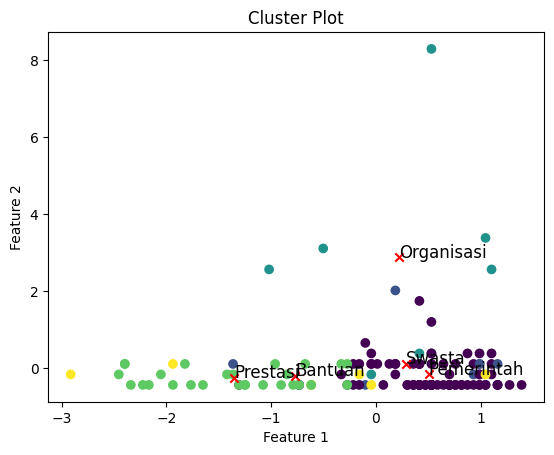

In [5]:
# Inputan baru untuk diprediksi
new_input = np.array([[3.8, 5, 3, 2, 1, 1, 1, 14, 13]])  # Ganti dengan inputan yang sesuai

# Lakukan standardisasi pada inputan baru
new_input_scaled = scaler.transform(new_input)

# Lakukan prediksi cluster
predicted_cluster = kmeans.predict(new_input_scaled)

# Tampilkan hasil prediksi
print("Inputan masuk ke cluster:", predicted_cluster)
if predicted_cluster == 0:
    print("Pemerintah")
elif predicted_cluster == 1:
    print("Swasta")
elif predicted_cluster == 2:
    print("Organisasi")
elif predicted_cluster == 3:
    print("Prestasi")
elif predicted_cluster == 4:
    print("Bantuan")
# Plotting the clusters
import matplotlib.pyplot as plt
# Plotting the clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', color='red')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Cluster Plot')

# Define the cluster labels
cluster_labels = {
    0: "Pemerintah",
    1: "Swasta",
    2: "Organisasi",
    3: "Prestasi",
    4: "Bantuan"
}


# Display the cluster labels
for i, label in cluster_labels.items():
    plt.text(kmeans.cluster_centers_[i, 0], kmeans.cluster_centers_[i, 1], label, color='black', fontsize=12)

plt.show()

Save the **Model**

In [6]:
# Save the model
model.save('model.h5')

c:\Users\Akbar Aj\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Create **Save Model Folder**

In [7]:
export_dir = 'saved_model/1'
tf.saved_model.save(model, export_dir)

INFO:tensorflow:Assets written to: saved_model/1\assets


INFO:tensorflow:Assets written to: saved_model/1\assets


Convert Saved Model to TfLite

In [8]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

In [9]:
tflite_model_file = pathlib.Path('model.tflite')
tflite_model_file.write_bytes(tflite_model)

15864